### TEXT CLASSIFICATION

In [1]:
# import packages for analysis
import bamboolib as bam
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neural_network import MLPClassifier

In [2]:
#load data set
letter =  pd.read_csv("/Users/damilolaodunuga/Downloads/PC File/ALY 6020/letters.csv")
letter.head()

,label,pixel43,pixel44,pixel92,pixel124,pixel125,pixel126,pixel127,pixel128,pixel129,...,pixel329,pixel351,pixel410,pixel411,pixel412,pixel413,pixel414,pixel415,pixel416,pixel417
0,1,0,0,0,0,0,0,0,0,0,...,0,254,0,0,0,0,0,0,0,0
1,0,0,0,0,137,137,192,86,72,1,...,254,0,0,75,254,254,254,17,0,0
2,1,0,0,0,3,141,139,3,0,0,...,0,184,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,94,255,69,0,0,0,0,0
4,0,0,0,0,155,254,254,254,157,30,...,253,0,0,0,223,253,253,253,129,0


In [3]:
#Find null values
letter.isnull().values.any()

False

In [4]:
letter.describe().T

,count,mean,std,min,25%,50%,75%,max
label,42000.0,4.456643,2.887730,0.0,2.0,4.0,7.0,9.0
pixel43,42000.0,0.171357,5.726352,0.0,0.0,0.0,0.0,255.0
pixel44,42000.0,0.164476,5.515774,0.0,0.0,0.0,0.0,255.0
pixel92,42000.0,1.192833,14.692403,0.0,0.0,0.0,0.0,255.0
pixel124,42000.0,28.043952,70.505431,0.0,0.0,0.0,0.0,255.0
pixel125,42000.0,36.084976,78.631145,0.0,0.0,0.0,0.0,255.0
pixel126,42000.0,42.713952,84.390533,0.0,0.0,0.0,10.0,255.0
pixel127,42000.0,46.092310,87.287033,0.0,0.0,0.0,29.0,255.0
pixel128,42000.0,44.542452,85.740313,0.0,0.0,0.0,21.0,255.0
pixel129,42000.0,38.948524,81.223946,0.0,0.0,0.0,0.0,255.0


(array([8816., 8528., 7867., 8538., 8251.]),
 array([0. , 1.8, 3.6, 5.4, 7.2, 9. ]),
 <BarContainer object of 5 artists>)

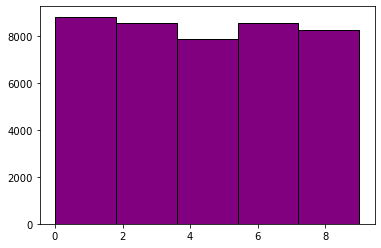

In [5]:
plt.hist(letter['label'], bins=5, color='purple', edgecolor='black')

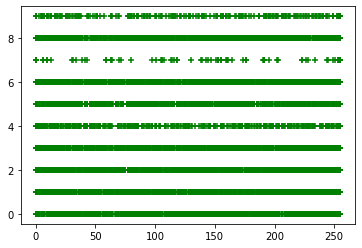

In [6]:
plt.scatter(letter['pixel155'], letter['label'], color="green",marker='+')

(array([25094.,  2013.,  1660.,  1809.,  1948.,  9476.]),
 array([  0. ,  42.5,  85. , 127.5, 170. , 212.5, 255. ]),
 <BarContainer object of 6 artists>)

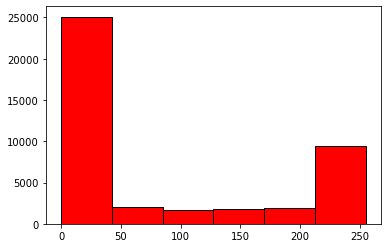

In [52]:
plt.hist(letter['pixel411'], bins=6, color='red', edgecolor='black')

#### PART 1 - K NEAREST NEIGHBORS

In [7]:
# Identify dependent and independent variables
x =letter.drop("label", axis=1)
y = letter.label

In [8]:
# Train and test split
x_train, x_test, y_train, y_test =train_test_split(x, y, test_size=0.20, random_state=1)
len(x_train), len(x_test)

(33600, 8400)

In [9]:
#fitting knn model
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=20)

In [10]:
knn.score(x_test, y_test)

0.6578571428571428

In [11]:
# predict y
y_pred = knn.predict(x_test)

#confusion matrix
letter_cm = confusion_matrix(y_test, y_pred)

Text(0.5, 257.44, 'Predicted')

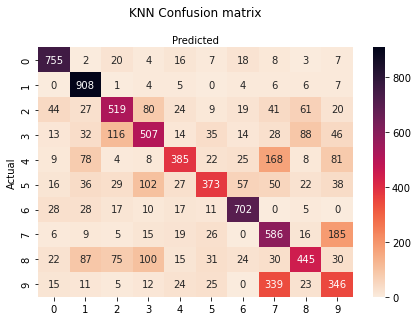

In [12]:
# name of classes
class_names=[0,1]
fig, ax =plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

#create heatmap for confusion matrix
sns.heatmap(pd.DataFrame(letter_cm), annot=True, cmap='rocket_r', fmt='g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('KNN Confusion matrix', y=1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')

In [13]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86       840
           1       0.75      0.96      0.84       941
           2       0.66      0.61      0.63       844
           3       0.60      0.57      0.58       893
           4       0.71      0.49      0.58       788
           5       0.69      0.50      0.58       750
           6       0.81      0.86      0.84       818
           7       0.47      0.68      0.55       867
           8       0.66      0.52      0.58       859
           9       0.46      0.43      0.44       800

    accuracy                           0.66      8400
   macro avg       0.66      0.65      0.65      8400
weighted avg       0.66      0.66      0.65      8400



In [14]:
from sklearn import metrics

# try K=1 through K=15 and record testing accuracy
k_range = range(1, 20)

# We can create Python dictionary using [] or dict()
scores = []

# We use a loop through the range 1 to 20
# We append the scores in the dictionary
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    letter_pred = knn.predict(x_test)
    scores.append(metrics.accuracy_score(y_test, letter_pred))

print(scores)

[0.6067857142857143, 0.6019047619047619, 0.6225, 0.6389285714285714, 0.6480952380952381, 0.6532142857142857, 0.6520238095238096, 0.6532142857142857, 0.6544047619047619, 0.6570238095238096, 0.6538095238095238, 0.6566666666666666, 0.6605952380952381, 0.6614285714285715, 0.6611904761904762, 0.6595238095238095, 0.6585714285714286, 0.6586904761904762, 0.6589285714285714]


#### PART 2 - NEURAL NETWORK MODEL

In [15]:
from sklearn.preprocessing import StandardScaler
X_train, X_test = x_train/255, x_test/255

In [16]:
#Package for neural network
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense

In [30]:
#Initializing neural network
mlp = MLPClassifier(hidden_layer_sizes=(32, 16, 10), max_iter=20, activation='relu', solver='adam', random_state=1)

In [31]:
#Fitting the model
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(32, 16, 10), max_iter=20, random_state=1)

In [33]:
#Predict Y using X_test
mlp_y_pred = mlp.predict(X_test)

In [36]:
#Confusion matrix
mlp_cm = confusion_matrix(mlp_y_pred, y_test)

Text(0.5, 257.44, 'Predicted')

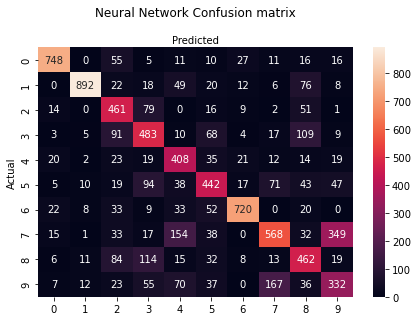

In [38]:
#Plot neural network confusion matrix
# name of classes
class_names=[0,1]
fig, ax =plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

#create heatmap for confusion matrix
sns.heatmap(pd.DataFrame(mlp_cm), annot=True, cmap='rocket', fmt='g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Neural Network Confusion matrix', y=1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')

In [43]:
print(classification_report(y_test, mlp_y_pred))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86       840
           1       0.81      0.95      0.87       941
           2       0.73      0.55      0.62       844
           3       0.60      0.54      0.57       893
           4       0.71      0.52      0.60       788
           5       0.56      0.59      0.58       750
           6       0.80      0.88      0.84       818
           7       0.47      0.66      0.55       867
           8       0.60      0.54      0.57       859
           9       0.45      0.41      0.43       800

    accuracy                           0.66      8400
   macro avg       0.66      0.65      0.65      8400
weighted avg       0.66      0.66      0.65      8400



In [53]:
mlp.score(X_test, y_test)

0.6566666666666666